In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Check if the directory exists
path = '/content/drive/MyDrive/archive (2)'
if os.path.exists(path):
    # List the files in the directory
    files = os.listdir(path)
    print(files)
else:
    print(f"Directory {path} not found.")


Mounted at /content/drive
['training', 'testing']


# New section

Found 60 image(s) in /content/drive/MyDrive/archive (2)/training/image_2


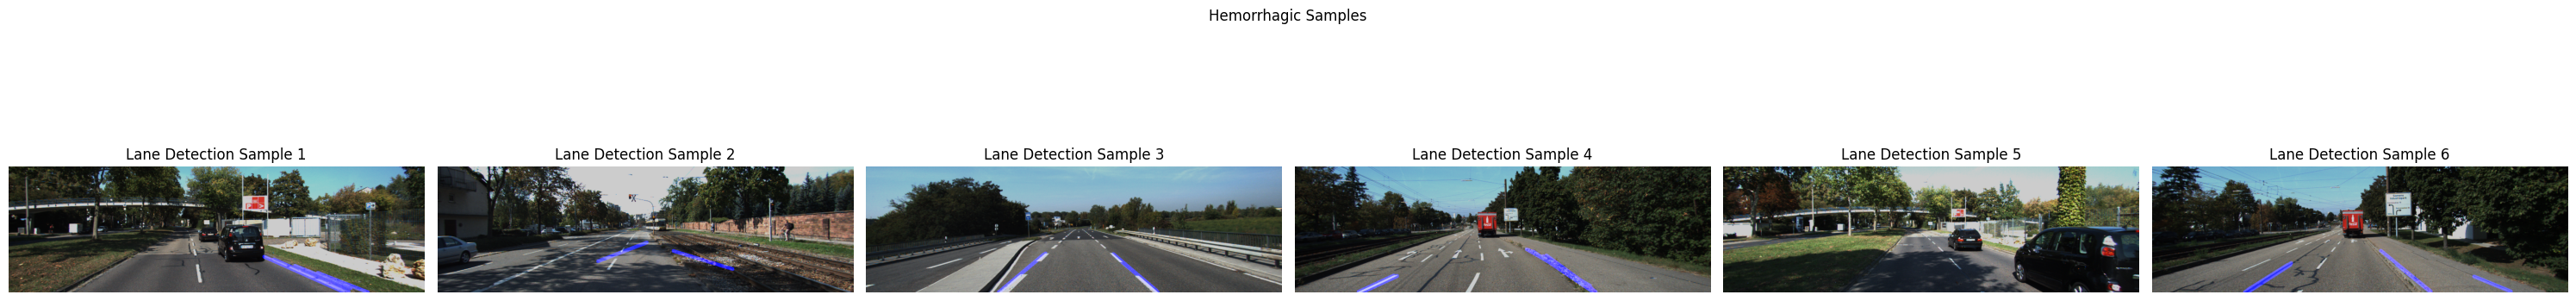

Found 60 image(s) in /content/drive/MyDrive/archive (2)/training/image_2


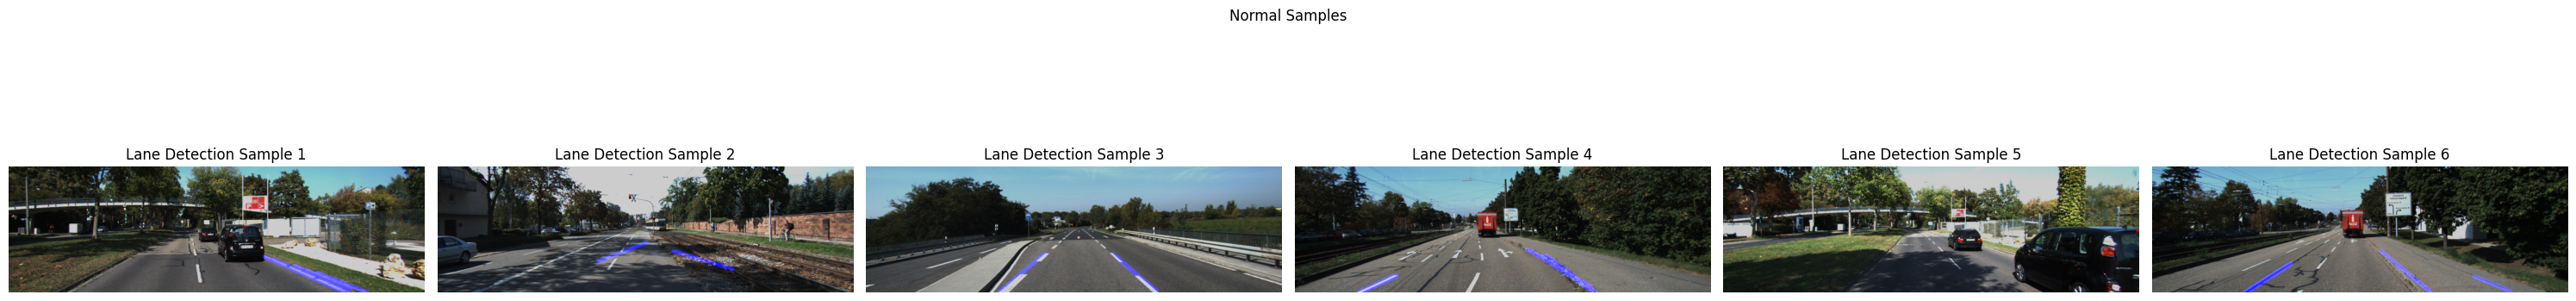

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to recursively get image files in a directory and its subdirectories
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                image_files.append(os.path.join(root, file))
    return image_files

# Helper function to draw lines on an image
def draw_lines(image, lines, color=[255, 0, 0], thickness=10):
    line_image = np.zeros_like(image)

    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), color, thickness)

    # Overlay the lines on the original image
    return cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Function to filter and extrapolate lane lines
def filter_lane_lines(lines, img_shape):
    left_lane_lines = []
    right_lane_lines = []
    left_slope_threshold = (-0.85, -0.3)  # Slopes for left lane
    right_slope_threshold = (0.3, 0.85)   # Slopes for right lane

    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else np.inf
            if left_slope_threshold[0] < slope < left_slope_threshold[1]:
                left_lane_lines.append(line)
            elif right_slope_threshold[0] < slope < right_slope_threshold[1]:
                right_lane_lines.append(line)

    return left_lane_lines, right_lane_lines

# Function to apply lane detection
def detect_lane(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None

    # Convert image to grayscale for edge detection
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 50, 150)

    # Define region of interest (ROI) for lane detection
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # Define a triangular region of interest (typical for road detection)
    region_of_interest_vertices = np.array([[
        (width * 0.1, height),  # Bottom left
        (width * 0.9, height),  # Bottom right
        (width * 0.5, height * 0.6)  # Top center (further down the road)
    ]], dtype=np.int32)

    # Fill the ROI in the mask
    cv2.fillPoly(mask, region_of_interest_vertices, 255)

    # Mask the edges image
    masked_edges = cv2.bitwise_and(edges, mask)

    # Apply Hough Line Transform to detect lines in the masked edge image
    lines = cv2.HoughLinesP(
        masked_edges,
        rho=1,
        theta=np.pi / 180,
        threshold=50,
        minLineLength=100,
        maxLineGap=50
    )

    # Filter lane lines by slope
    left_lane, right_lane = filter_lane_lines(lines, img.shape)

    # Draw the left and right lane lines
    lane_image = draw_lines(img, left_lane + right_lane)

    return lane_image

# Function to display lane detection results for sample images
def display_lane_detection_samples(directory, title, num_images=6):
    image_files = get_image_files(directory)
    print(f"Found {len(image_files)} image(s) in {directory}")

    if not image_files:
        print(f"No image files found in {directory}")
        return

    num_images_to_display = min(num_images, len(image_files))
    fig, axs = plt.subplots(1, num_images_to_display, figsize=(5 * num_images_to_display, 5))
    fig.suptitle(title)

    for i, img_path in enumerate(image_files[:num_images_to_display]):
        img_with_lanes = detect_lane(img_path)

        if img_with_lanes is not None:
            axs[i].imshow(cv2.cvtColor(img_with_lanes, cv2.COLOR_BGR2RGB))
            axs[i].axis('off')
            axs[i].set_title(f"Lane Detection Sample {i+1}")

    plt.tight_layout()
    plt.show()

# Define directories
hemorrhagic_dir = "/content/drive/MyDrive/archive (2)/training/image_2"
normal_dir = "/content/drive/MyDrive/archive (2)/training/image_2"

# Call the function to display lane detection samples
display_lane_detection_samples(hemorrhagic_dir, "Hemorrhagic Samples")
display_lane_detection_samples(normal_dir, "Normal Samples")


Found 48 images belonging to 3 classes.
Found 12 images belonging to 3 classes.
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 119s 44s/step - accuracy: 0.6181 - loss: 0.8389 - val_accuracy: 0.0000e+00 - val_loss: 1.0373 - learning_rate: 1.0000e-04
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 75s 20s/step - accuracy: 1.0000 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.6732 - learning_rate: 1.0000e-04
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 79s 34s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.4388 - learning_rate: 1.0000e-04
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 18s/step - accuracy: 1.0000 - loss: 2.8710e-04 - val_accuracy: 1.0000 - val_loss: 0.3166 - learning_rate: 1.0000e-04
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 18s/step - accuracy: 1.0000 - loss: 9.2600e-05 - val_accuracy: 1.0000 - val_loss: 0.2445 - learning_rate: 1.0000e-04
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 81s 33s/step - accuracy: 1.0000 - loss: 4.1266e-05 - val_accuracy: 1.0000 - val_loss: 0.1645 - learning_rate: 1.0000e-04
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 84s 35s/step - accuracy: 1.0000 - loss: 

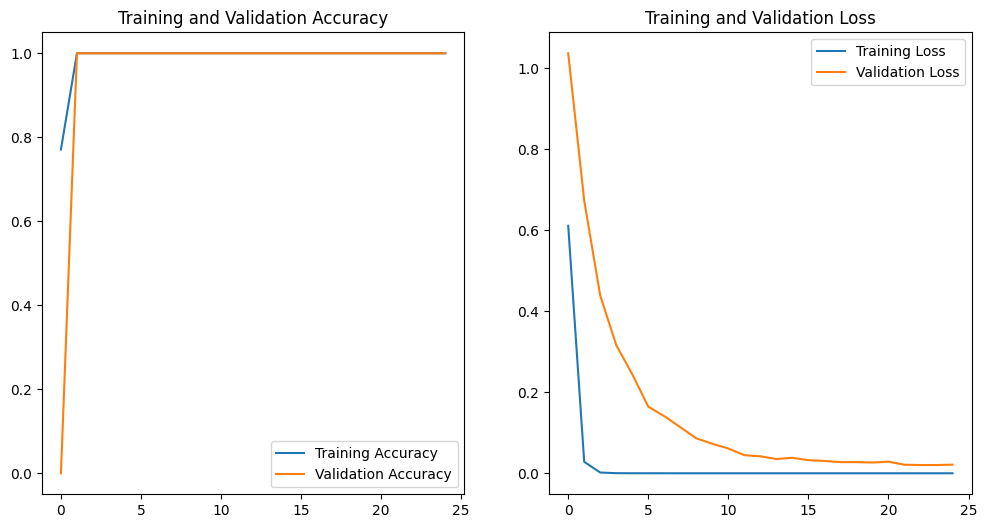

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the directory for your dataset (ensure it contains subdirectories for each class)
dataset_dir = "/content/drive/MyDrive/archive (2)/training/"

# Step 1: Data Augmentation with Validation Split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 20% for validation
)

# Train and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 80% of data for training
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)

# Step 2: Transfer Learning with ResNet101
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Fine-tuning - Freeze early layers of ResNet101 and train only the later layers
for layer in base_model.layers[:143]:
    layer.trainable = False

# Compile the model with a low learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Callbacks - Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping]
)

# Step 6: Visualize Training Progress
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the function to plot the training progress
plot_training(history)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Function to get all image file paths in a directory
def get_image_files(directory):
    image_extensions = ['.png', '.jpg', '.jpeg']  # Add other image formats if needed
    return [os.path.join(directory, f) for f in os.listdir(directory) if os.path.splitext(f)[-1].lower() in image_extensions]

# Function to preprocess images (resize, normalize, etc.)
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)  # Read the image
        if img is None:
            return None  # If the image is not valid
        img = cv2.resize(img, (128, 128))  # Resize image to 128x128 pixels (modify as needed)
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Function to load data
def load_data(hemorrhagic_dir, normal_dir):
    images = []
    labels = []

    # Load hemorrhagic images and assign label 1
    hemorrhagic_files = get_image_files(hemorrhagic_dir)
    for image_path in hemorrhagic_files:
        img = preprocess_image(image_path)
        if img is not None:
            images.append(img)
            labels.append(1)

    # Load normal images and assign label 0
    normal_files = get_image_files(normal_dir)
    for image_path in normal_files:
        img = preprocess_image(image_path)
        if img is not None:
            images.append(img)
            labels.append(0)

    return np.array(images), np.array(labels)

# Define the directories for hemorrhagic and normal images
hemorrhagic_dir = '/content/drive/MyDrive/archive (2)/training/image_2'
normal_dir = '/content/drive/MyDrive/archive (2)/training/image_2'

# Load data from both directories
X, y = load_data(hemorrhagic_dir, normal_dir)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}")


Training data: (96, 128, 128, 3), Validation data: (24, 128, 128, 3)


In [15]:
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None
        img = cv2.resize(img, (224, 224))  # Resize image to 224x224 pixels
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example of modifying the model's input shape to (128, 128, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6250 - loss: 0.6866
Validation Accuracy: 62.50%


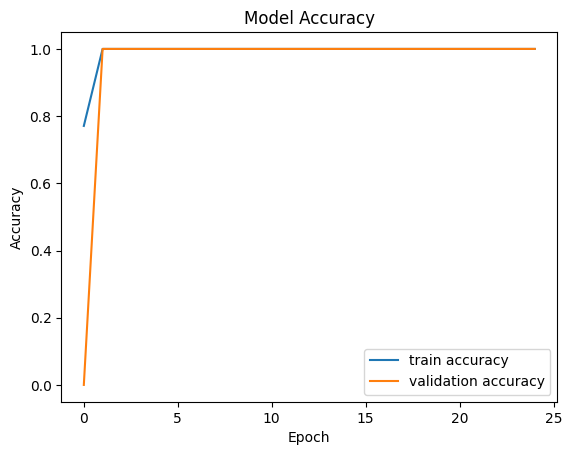

In [18]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [19]:
# Define a Self-Attention Layer with printing
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class SelfAttention(Layer):
    def _init_(self, **kwargs):
        super(SelfAttention, self)._init_(**kwargs)

    def build(self, input_shape):
        # Initialize weight matrix and bias
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer='zeros', trainable=True)

    def call(self, inputs):
        # Compute query, key, value
        Q = tf.matmul(inputs, self.W) + self.b
        K = tf.matmul(inputs, self.W) + self.b
        V = inputs

        # Print the computed query, key, and value
        tf.print("Query (Q):", Q)
        tf.print("Key (K):", K)
        tf.print("Value (V):", V)

        # Compute attention scores
        attention_scores = tf.matmul(Q, K, transpose_b=True)
        tf.print("Attention Scores:", attention_scores)

        # Compute attention weights using softmax
        attention_weights = tf.nn.softmax(attention_scores)
        tf.print("Attention Weights:", attention_weights)

        # Apply attention weights to values
        output = tf.matmul(attention_weights, V)
        tf.print("Output after attention:", output)

        return output

# Example usage of the SelfAttention layer
# Create some random input data to pass through the layer
input_data = tf.random.normal((1, 5, 64))  # Shape (batch_size, sequence_length, feature_dim)
self_attention_layer = SelfAttention()

# Run the layer with the input data and print outputs
output = self_attention_layer(input_data)

Query (Q): [[[0.232170328 -0.496267259 -0.436071575 ... 0.423299938 0.182820335 0.175050437]
  [0.543842912 0.581885457 0.390108198 ... 0.395175874 0.29401052 -0.652117372]
  [-0.47786963 -0.475059539 -0.51793915 ... 0.319805 0.568818629 -0.53659755]
  [0.237982363 -0.312143177 0.153909385 ... -0.0311415903 0.674968183 -0.127425119]
  [0.283933 -0.236786857 0.44830972 ... -0.244486183 0.0463349037 0.540300548]]]
Key (K): [[[0.232170328 -0.496267259 -0.436071575 ... 0.423299938 0.182820335 0.175050437]
  [0.543842912 0.581885457 0.390108198 ... 0.395175874 0.29401052 -0.652117372]
  [-0.47786963 -0.475059539 -0.51793915 ... 0.319805 0.568818629 -0.53659755]
  [0.237982363 -0.312143177 0.153909385 ... -0.0311415903 0.674968183 -0.127425119]
  [0.283933 -0.236786857 0.44830972 ... -0.244486183 0.0463349037 0.540300548]]]
Value (V): [[[0.848425925 0.643147528 0.610654354 ... 0.859882653 0.87997663 0.207702801]
  [1.14597082 -1.69277084 -0.0104701146 ... 0.289415777 0.173412532 0.0439633206

In [20]:
# Integrate Self-Attention in Your Model
def create_model_with_attention():
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = SelfAttention()(x)  # Add self-attention layer
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

model = create_model_with_attention()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None
        img = cv2.resize(img, (224, 224))  # Resize image to 224x224 pixels
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


In [24]:
# Function to resize images to 224x224
def resize_images(images):
    resized_images = np.array([cv2.resize(img, (224, 224)) for img in images])
    return resized_images

# Resize X_train and X_val to 224x224
X_train_resized = resize_images(X_train)
X_val_resized = resize_images(X_val)

# Normalization (if needed)
X_train_resized = X_train_resized / 255.0
X_val_resized = X_val_resized / 255.0


In [32]:
# Function to resize images to 224x224
def resize_images(images):
    resized_images = np.array([cv2.resize(img, (224, 224)) for img in images])
    return resized_images

# Resize X_train and X_val to 224x224
X_train_resized = resize_images(X_train)
X_val_resized = resize_images(X_val)

# Normalization (if needed)
X_train_resized = X_train_resized / 255.0
X_val_resized = X_val_resized / 255.0


In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Query (Q): [[-0.757666945 1.76082385 -0.839612961 ... 2.15476513 0.749105871 -0.180006757]
 [-1.46638513 1.67244327 -0.907597303 ... 2.92512274 0.654659331 -0.915122092]
 [-2.03281784 2.23712492 -0.188245058 ... 2.58976579 0.590866387 -0.506785512]
 ...
 [-1.58938193 2.53262448 1.49503 ... 2.42507195 2.00729012 -1.19516349]
 [-0.646313965 1.54816365 0.449881375 ... 2.36394382 1.06609559 -0.432624668]
 [-0.563253582 1.08957338 0.122192681 ... 1.259323 1.59109426 0.749711812]]
Key (K): [[-0.757666945 1.76082385 -0.839612961 ... 2.15476513 0.749105871 -0.180006757]
 [-1.46638513 1.67244327 -0.907597303 ... 2.92512274 0.654659331 -0.915122092]
 [-2.03281784 2.23712492 -0.188245058 ... 2.58976579 0.590866387 -0.506785512]
 ...
 [-1.58938193 2.53262448 1.49503 ... 2.42507195 2.00729012 -1.19516349]
 [-0.646313965 1.54816365 0.449881375 ... 2.36394382 1.06609559 -0.432624668]
 [-0.563253582 1.08957338 0.122192681 ... 1.259323 1.59109426 0.749711812]]
Value (V): [[0 0.253513932 0.101454698 ...

In [ ]:
#  Define the ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification
    return model


In [ ]:
# Combine ResNet-101 with ANN
def create_combined_model():
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = SelfAttention()(x)  # Add self-attention layer

    # Create the ANN model
    ann_model = create_ann_model(input_dim=x.shape[1])

    # Connect the ANN to the ResNet output
    combined_output = ann_model(x)

    model = Model(inputs=base_model.input, outputs=combined_output)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

model = create_combined_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the Combined Model
# Data augmentation
datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=10)  # Adjust epochs as necessary


Epoch 1/10
Query (Q): [[-0.525497735 0.152677909 -2.95995283 ... -0.303426385 -0.464079201 -0.424302518]
 [-0.535144746 0.403576 -2.77427673 ... -0.241338283 -0.604766 -0.167124078]
 [-0.597198 0.408569276 -2.78069878 ... -0.178976953 -0.586256266 -0.069196336]
 ...
 [-0.640297055 0.295785666 -2.70998502 ... -0.253204107 -0.606441438 -0.0675518438]
 [-0.661579728 0.3774046 -2.72438049 ... -0.142920315 -0.573616922 -0.0581881292]
 [-0.617768824 0.45265016 -2.79750538 ... -0.104545295 -0.636208296 -0.0861469656]]
Key (K): [[-0.525497735 0.152677909 -2.95995283 ... -0.303426385 -0.464079201 -0.424302518]
 [-0.535144746 0.403576 -2.77427673 ... -0.241338283 -0.604766 -0.167124078]
 [-0.597198 0.408569276 -2.78069878 ... -0.178976953 -0.586256266 -0.069196336]
 ...
 [-0.640297055 0.295785666 -2.70998502 ... -0.253204107 -0.606441438 -0.0675518438]
 [-0.661579728 0.3774046 -2.72438049 ... -0.142920315 -0.573616922 -0.0581881292]
 [-0.617768824 0.45265016 -2.79750538 ... -0.104545295 -0.63620

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Query (Q): [[-1.04795408 -0.0955642462 -3.1341815 ... 1.75232434 0.273345381 -1.63742626]
 [-0.580006301 0.240578443 -1.88420558 ... 1.40904319 0.547635615 -2.27928758]
 [-0.929507256 -0.745669246 -3.12080646 ... 0.488315076 0.938500166 -3.57209373]
 ...
 [-0.436421573 -0.308614373 -4.38067913 ... 1.6686691 0.0253551137 -3.98497891]
 [-0.251692444 -0.131015569 -3.49103284 ... 2.17808485 1.27257216 -2.81204748]
 [-1.35740137 -0.576688826 -2.57625699 ... 1.46159792 0.412107587 -3.66701174]]
Key (K): [[-1.04795408 -0.0955642462 -3.1341815 ... 1.75232434 0.273345381 -1.63742626]
 [-0.580006301 0.240578443 -1.88420558 ... 1.40904319 0.547635615 -2.27928758]
 [-0.929507256 -0.745669246 -3.12080646 ... 0.488315076 0.938500166 -3.57209373]
 ...
 [-0.436421573 -0.308614373 -4.38067913 ... 1.6686691 0.0253551137 -3.98497891]
 [-0.251692444 -0.131015569 -3.49103284 ... 2.17808485 1.27257216 -2.81204748]
 [-1.35740137 -0.576688826 -2.57625699 ... 1.46159792 0.412107587 -3.66701174]]
Value (V): [[0

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Step 1: Preprocessing with color filtering (HLS color space to enhance lane lines)
def preprocess_image(image):
    # Convert to HLS color space (Hue, Lightness, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    # Extract the white and yellow lanes using color thresholds
    lower_white = np.array([0, 200, 0], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    white_mask = cv2.inRange(hls, lower_white, upper_white)

    lower_yellow = np.array([10, 0, 100], dtype=np.uint8)
    upper_yellow = np.array([40, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(hls, lower_yellow, upper_yellow)

    # Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    filtered_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Edge Detection
    edges = cv2.Canny(blur, 50, 150)

    return edges

# Step 2: Region of Interest (Mask the non-relevant parts of the image)
def region_of_interest(edges):
    height = edges.shape[0]
    width = edges.shape[1]

    # Define a polygon mask that focuses on the lower half of the image (road area)
    mask = np.array([[
        (int(0.1 * width), height),
        (int(0.9 * width), height),
        (int(0.6 * width), int(0.6 * height)),
        (int(0.4 * width), int(0.6 * height))
    ]], dtype=np.int32)

    # Create an empty mask and fill the polygon region
    mask_image = np.zeros_like(edges)
    cv2.fillPoly(mask_image, mask, 255)

    # Apply the mask to the edges image
    masked_edges = cv2.bitwise_and(edges, mask_image)

    return masked_edges

# Step 3: Apply Hough Transform to detect lane lines
def detect_lanes(masked_edges, image):
    # Parameters for HoughLinesP
    rho = 1         # Distance resolution in pixels
    theta = np.pi / 180  # Angular resolution in radians
    threshold = 50   # Minimum number of votes to be considered a line
    min_line_length = 100  # Minimum length of a line in pixels
    max_line_gap = 50  # Maximum allowed gap between line segments

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Create an image to draw the lines on
    line_image = np.zeros_like(image)

    # Draw lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

    return line_image

# Step 4: Combine the original image with the line image
def combine_images(image, line_image):
    # Combine the original image with the lane lines
    combined = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    return combined

# Full lane detection pipeline
def lane_detection_pipeline(image):
    edges = preprocess_image(image)
    masked_edges = region_of_interest(edges)
    line_image = detect_lanes(masked_edges, image)
    final_image = combine_images(image, line_image)

    return final_image

# Load an image for lane detection
image_path = "/content/drive/MyDrive/archive (2)/training/image_2.jpg"  # Ensure the correct file extension
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Step 5: Apply lane detection pipeline
    lane_detected_image = lane_detection_pipeline(image)

    # Display the original and processed images
    display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), "Original Image")
    display_image(cv2.cvtColor(lane_detected_image, cv2.COLOR_BGR2RGB), "Lane Detected Image")


Error: Image not found. Please check the file path.


In [ ]:
pip install opencv-python numpy matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Step 1: Preprocessing with color filtering (HLS color space to enhance lane lines)
def preprocess_image(image):
    # Convert to HLS color space (Hue, Lightness, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    # Extract the white and yellow lanes using color thresholds
    lower_white = np.array([0, 200, 0], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    white_mask = cv2.inRange(hls, lower_white, upper_white)

    lower_yellow = np.array([10, 0, 100], dtype=np.uint8)
    upper_yellow = np.array([40, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(hls, lower_yellow, upper_yellow)

    # Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    filtered_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Edge Detection
    edges = cv2.Canny(blur, 50, 150)

    return edges

# Step 2: Region of Interest (Mask the non-relevant parts of the image)
def region_of_interest(edges):
    height = edges.shape[0]
    width = edges.shape[1]

    # Define a polygon mask that focuses on the lower half of the image (road area)
    mask = np.array([[
        (int(0.1 * width), height),
        (int(0.9 * width), height),
        (int(0.6 * width), int(0.6 * height)),
        (int(0.4 * width), int(0.6 * height))
    ]], dtype=np.int32)

    # Create an empty mask and fill the polygon region
    mask_image = np.zeros_like(edges)
    cv2.fillPoly(mask_image, mask, 255)

    # Apply the mask to the edges image
    masked_edges = cv2.bitwise_and(edges, mask_image)

    return masked_edges

# Step 3: Apply Hough Transform to detect lane lines
def detect_lanes(masked_edges, image):
    # Parameters for HoughLinesP
    rho = 1         # Distance resolution in pixels
    theta = np.pi / 180  # Angular resolution in radians
    threshold = 50   # Minimum number of votes to be considered a line
    min_line_length = 100  # Minimum length of a line in pixels
    max_line_gap = 50  # Maximum allowed gap between line segments

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Create an image to draw the lines on
    line_image = np.zeros_like(image)

    # Draw lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

    return line_image

# Step 4: Combine the original image with the line image
def combine_images(image, line_image):
    # Combine the original image with the lane lines
    combined = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    return combined

# Full lane detection pipeline
def lane_detection_pipeline(image):
    edges = preprocess_image(image)
    masked_edges = region_of_interest(edges)
    line_image = detect_lanes(masked_edges, image)
    final_image = combine_images(image, line_image)

    return final_image

# Load an image for lane detection
image_path = "/content/drive/MyDrive/archive (2)/training/umm_000002.png"  # Replace with your image filename
image = cv2.imread(image_path)

# Check if the image has been loaded properly
if image is None:
    raise FileNotFoundError(f"Error: Unable to load image. Check the file path: {image_path}")

# Step 5: Apply lane detection pipeline
lane_detected_image = lane_detection_pipeline(image)

# Display the original and processed images
display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), "Original Image")
display_image(cv2.cvtColor(lane_detected_image, cv2.COLOR_BGR2RGB), "Lane Detected Image")


FileNotFoundError: Error: Unable to load image. Check the file path: /content/drive/MyDrive/archive (2)/training/umm_000002.png

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List files in the directory
directory_path = '/content/drive/MyDrive/archive (2)/training/'  # Adjust this path as needed
print(os.listdir(directory_path))


['image_2', 'gt_image_2', 'calib']


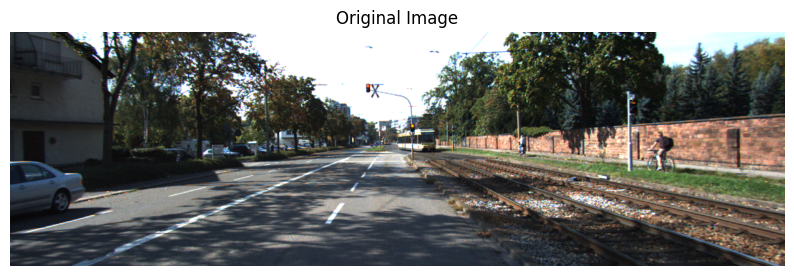

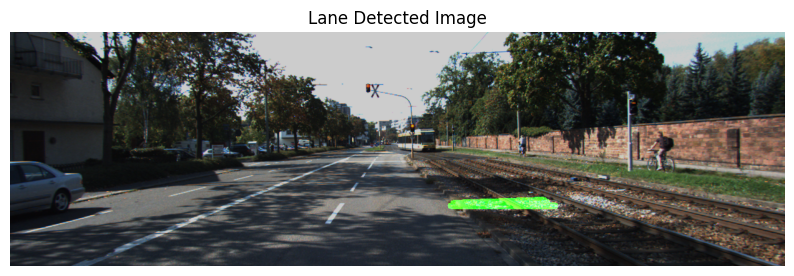

In [ ]:
image_path = '/content/drive/MyDrive/archive (2)/training/image_2/umm_000002.png'  # Update this if needed
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Error: Unable to load image. Check the file path: {image_path}")
else:
    print("Image loaded successfully!")


Image loaded successfully!
